In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define output directory for naive portfolio outputs
output_dir = "naive_outputs"
os.makedirs(output_dir, exist_ok=True)

In [2]:
# Load data

# Definte our ETFs
etfs = ['SPY', 'QQQ', 'IWM', 'EFA', 'EEM', 'VNQ', 'TLT', 'IEF', 'GLD', 'USO']

# Load adjusted prices from EODHD-based CSV (2015 to today)
adj_close_prices = pd.read_csv("../data/etf_prices.csv", index_col=0, parse_dates=True)[etfs]

# We'll use all data from 2015 onward for consistency with rolling Markowitz
returns = adj_close_prices.pct_change().dropna()
print(f"Date range: {adj_close_prices.index.min().date()} to {adj_close_prices.index.max().date()}")
print(f"Shape: {adj_close_prices.shape}")
print(f"ETFs: {list(adj_close_prices.columns)}")

Date range: 2013-01-02 to 2025-07-18
Shape: (3155, 10)
ETFs: ['SPY', 'QQQ', 'IWM', 'EFA', 'EEM', 'VNQ', 'TLT', 'IEF', 'GLD', 'USO']


In [3]:
# Equal weight portfolio setup
n_assets = len(etfs)
equal_weights = np.ones(n_assets) / n_assets

# Test period returns (2024-01-01 to 2025-07-01)
test_returns = returns.loc['2025-01-01':'2025-07-01']
portfolio_returns = test_returns.dot(equal_weights)

In [4]:
# Simulate wealth growth over test period
wealth = (1 + portfolio_returns).cumprod()

print(f"Starting wealth: ${wealth.iloc[0]:.2f}")
print(f"Final wealth: ${wealth.iloc[-1]:.2f}")
print(f"Total return: {(wealth.iloc[-1] - 1):.2%}")

Starting wealth: $1.00
Final wealth: $1.08
Total return: 7.85%


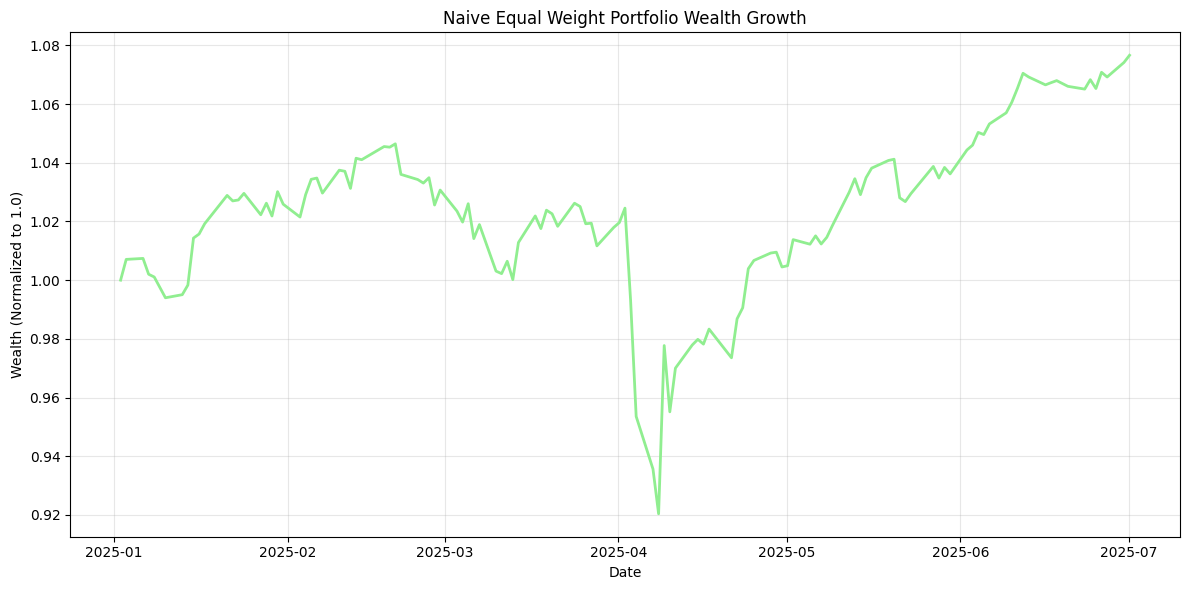

Saved wealth plot to naive_outputs\naive_portfolio_plot.png


In [5]:
# Plot normalized naive portfolio wealth curve (Markowitz style)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(wealth / wealth.iloc[0], linewidth=2, color='lightgreen')
ax.set_title('Naive Equal Weight Portfolio Wealth Growth')
ax.set_xlabel('Date')
ax.set_ylabel('Wealth (Normalized to 1.0)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "naive_portfolio_plot.png"), bbox_inches='tight')
plt.show()
print(f"Saved wealth plot to {os.path.join(output_dir, 'naive_portfolio_plot.png')}")

In [6]:
# Calculate performance metrics 

# Standard Sharpe: arithmetic mean of daily excess returns over risk-free (rf=4% annualized)
rf_annual = 0.04
rf_daily = rf_annual / 252
excess_returns = portfolio_returns - rf_daily

annualized_return = excess_returns.mean() * 252
annualized_volatility = excess_returns.std(ddof=1) * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility > 0 else 0

# CAGR & Max Drawdown based on wealth series
n_days = len(wealth)
if n_days > 1:
    cagr = (wealth.iloc[-1] / wealth.iloc[0]) ** (252 / (n_days - 1)) - 1
else:
    cagr = 0.0
running_max = wealth.cummax()
drawdowns = wealth / running_max - 1.0
max_drawdown = drawdowns.min() 

print(f"Naive Equal Weight Portfolio Metrics (Test Period: {wealth.index[0].strftime('%Y-%m-%d')} to {wealth.index[-1].strftime('%Y-%m-%d')}):")
print(f"Annualized Excess Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"CAGR: {cagr:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")

Naive Equal Weight Portfolio Metrics (Test Period: 2025-01-02 to 2025-07-01):
Annualized Excess Return: 12.67%
Annualized Volatility: 15.44%
Sharpe Ratio: 0.82
CAGR: 16.48%
Max Drawdown: -12.05%


In [7]:
# Save comprehensive metrics to file
with open(os.path.join(output_dir, "naive_metrics.txt"), "w") as f:
    f.write(f"Naive Equal Weight Portfolio Metrics (Test Period: {wealth.index[0].strftime('%Y-%m-%d')} to {wealth.index[-1].strftime('%Y-%m-%d')})\n")
    f.write(f"=" * 60 + "\n")
    f.write(f"Annualized Excess Return: {annualized_return:.2%}\n")
    f.write(f"Annualized Volatility: {annualized_volatility:.2%}\n")
    f.write(f"Sharpe Ratio: {sharpe_ratio:.2f}\n")
    f.write(f"CAGR: {cagr:.2%}\n")
    f.write(f"Max Drawdown: {max_drawdown:.2%}\n")
    f.write(f"\nPortfolio Configuration:\n")
    f.write(f"Strategy: Equal Weight (10% per ETF)\n")
    f.write(f"Number of ETFs: {len(etfs)}\n")
    f.write(f"Test Period: {wealth.index[0].strftime('%Y-%m-%d')} to {wealth.index[-1].strftime('%Y-%m-%d')}\n")
    f.write(f"ETFs: {', '.join(etfs)}\n")

print(f"Metrics saved to: {os.path.join(output_dir, 'naive_metrics.txt')}")

Metrics saved to: naive_outputs\naive_metrics.txt
